<a href="https://colab.research.google.com/github/dercodeKoenig/image-upscaling.net_API/blob/main/image_upscaling_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# remove default files and download test image for upscaling and background removal
!rm -r *
!wget https://image-upscaling.net/assets/images/test_image.jpg

--2025-09-09 10:40:21--  https://image-upscaling.net/assets/images/test_image.jpg
Resolving image-upscaling.net (image-upscaling.net)... 104.21.31.237, 172.67.180.202, 2606:4700:3032::ac43:b4ca, ...
Connecting to image-upscaling.net (image-upscaling.net)|104.21.31.237|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /static/assets/images/test_image.jpg [following]
--2025-09-09 10:40:22--  https://image-upscaling.net/static/assets/images/test_image.jpg
Reusing existing connection to image-upscaling.net:443.
HTTP request sent, awaiting response... 200 OK
Length: 28794 (28K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]  28.12K  --.-KB/s    in 0s      

2025-09-09 10:40:22 (83.4 MB/s) - ‘test_image.jpg’ saved [28794/28794]



# setting server url and client id for future requests

In [2]:
import requests
import json

serverurl = "https://image-upscaling.net"
client_id = "af25d8e9971a747bf55c17195f39757b"

# Cookie with a valid 32-digit client_id will always be sent with the request
cookies = {
    "client_id": client_id
}

# upscaling api

In [3]:
## uploading an image to be processed

use_face_enhance = False
scale = 4
model = "plus"
path = "test_image.jpg"

url = "/".join([serverurl, "upscaling_upload"])

data = {}
if use_face_enhance:
        data["fx"] = ""
data["scale"] = scale
data["model"] = model

files = {
    "image": ("my_custom_name.jpg", open(path, "rb"))
}

response = requests.post(url, data=data, files=files, cookies=cookies)
print(response.text)

my_custom_name_2025-09-09_10:40:22.746684.jpg


In [4]:
## getting information about the images on the server

url = "/".join([serverurl, "upscaling_get_status"])
response = requests.get(url, cookies=cookies)
print(response.json())

{'pending': ['https://image-upscaling.net/download_upscaling_data/my_custom_name_2025-09-09_10:40:22.746684.jpg'], 'processed': [], 'processing': []}


In [5]:
## downloading the processed file(s)

while True:
  url = "/".join([serverurl, "upscaling_get_status"])
  response = requests.get(url, cookies=cookies).json()

  pending = response["pending"]
  processing = response["processing"]
  processed = response["processed"]
  print(pending, processing, processed)

  # download all processed images
  for url in processed:
    filename = url.split("/")[-1]

    preview = False
    delete_after_download = True
    params = {}
    if preview:
      params["preview"] = ""
    if delete_after_download:
      params["delete_after_download"] = ""

    print("downloading", filename)
    respone = requests.get(url, cookies=cookies, params = params)
    with open(filename, "wb") as f:
      f.write(respone.content)

  # if no requests are pending or processing or processed, everything is complete
  if len(pending) == 0 and len(processing) == 0 and len(processed) == 0:
    break
  else:
    import time
    time.sleep(1)



['https://image-upscaling.net/download_upscaling_data/my_custom_name_2025-09-09_10:40:22.746684.jpg'] [] []
[] ['https://image-upscaling.net/download_upscaling_data/my_custom_name_2025-09-09_10:40:22.746684.jpg'] []
[] [] ['https://image-upscaling.net/download_upscaling_data/my_custom_name_2025-09-09_10:40:22.746684.jpg.png']
downloading my_custom_name_2025-09-09_10:40:22.746684.jpg.png
[] [] []


# remove-background api

In [6]:
## uploading an image to be processed

path = "test_image.jpg"

url = "/".join([serverurl, "removebg_upload"])

files = {
        "image": open(path, "rb")
}

response = requests.post(url, files=files, cookies=cookies)
print(response.text)

image will be processed


In [7]:
## getting information about the images on the server

url = "/".join([serverurl, "removebg_get_status"])
response = requests.get(url, cookies=cookies)
print(response.json())

{'pending': ['https://image-upscaling.net/download_removebg_data/pending/test_image_2025-09-09_10:40:29.369050.jpg'], 'processed': [], 'processing': []}


In [8]:
## downloading the processed file(s)

while True:
  url = "/".join([serverurl, "removebg_get_status"])
  response = requests.get(url, cookies=cookies).json()

  pending = response["pending"]
  processing = response["processing"]
  processed = response["processed"]
  print(pending, processing, processed)

  # download all processed images
  for url in processed:
    filename = url.split("/")[-1]

    preview = False
    delete_after_download = True
    params = {}
    if preview:
      params["preview"] = ""
    if delete_after_download:
      params["delete_after_download"] = ""

    print("downloading", filename)
    respone = requests.get(url, cookies=cookies, params = params)
    with open(filename, "wb") as f:
      f.write(respone.content)

  # if no requests are pending or processing or processed, everything is complete
  if len(pending) == 0 and len(processing) == 0 and len(processed) == 0:
    break
  else:
    import time
    time.sleep(1)



[] ['https://image-upscaling.net/download_removebg_data/processing/test_image_2025-09-09_10:40:29.369050.jpg'] []
[] ['https://image-upscaling.net/download_removebg_data/processing/test_image_2025-09-09_10:40:29.369050.jpg'] []
[] [] ['https://image-upscaling.net/download_removebg_data/processed/test_image_2025-09-09_10:40:29.369050.jpg.png']
downloading test_image_2025-09-09_10:40:29.369050.jpg.png
[] [] []


# text-to-speech api

In [9]:
## submit text to be processed

url = "/".join([serverurl, "tts_submit"])

data = {}
data["text"] = "This is the text to speech api"
data["voice"] = "am_michael"
data["speed"] = 1.1

response = requests.post(url, json=data, cookies=cookies)
print(response.text)

1757414435446


In [10]:
## getting information on requests

url = "/".join([serverurl, "tts_get_data"])
response = requests.get(url, cookies = cookies)
print(response.json())

[{'req_id': 1757414435446, 'result': '', 'speed': 1.1, 'status': 'pending', 'text': 'This is the text to speech api', 'voice': 'am_michael'}]


In [11]:
## downloading all results

while True:
  url = "/".join([serverurl, "tts_get_data"])
  response = requests.get(url, cookies = cookies).json()

  for element in response:
    url = element["result"] # get the download url here, (mp3 file)
    if url != "":
      print(url)

      params = {}
      params["delete_after_download"] = "" # delete the file after downloading it
      file_content = requests.get(url, params=params, cookies=cookies).content

      filename = url.split("/")[-1]+".mp3"
      with open(filename, "wb") as f:
        f.write(file_content)

  if len(response) == 0:
    break
  else:
    import time
    time.sleep(1)


https://image-upscaling.net/download_tts_result/1757414435446


In [12]:
# display the mp3 file
from IPython.display import Audio
Audio(filename)

# Flux Style api
For the Flux Editor the request is divided in two parts.
- First you generate an image with dev pro or max OR you upload one yourself. After generating or uploading an image it is automatically selected. To change the selected image, use
```
iedit_set_selected?req_id='id of the image to be selected or -1 to clear canvas if you want to generate a image with dev, pro or max'
```
- when you have an image selected, you can submit a job to process the selected image



In [13]:
## uploading an image to be processed

path = "test_image.jpg"
url = "/".join([serverurl, "iedit_upload"])
files = {"image": open(path, "rb")}
response = requests.post(url, files=files, cookies=cookies)
print(response.text)

image uploaded


In [14]:
## get status and check selected image

url = "/".join([serverurl, "iedit_get_status"])
response = requests.get(url, cookies=cookies).json()
response

{'entries': [{'filename': 'test_image_2025-09-09_10:40:43.288415.jpg',
   'req_id': 1757414443288,
   'result': 'http://image-upscaling.net/iedit_download_data/1757414443288',
   'status': 0,
   'text': ''}],
 'selected': 1757414443288}

In [21]:
## submit the job

url = "/".join([serverurl, "iedit_submit_job"])
data = {
    "model": "style",           # select style model
    "selectedStyle": "Ghibli"  # select the desired style
}
request_id = requests.post(url, data=data, cookies=cookies).text
print(request_id)

1757414567668


In [22]:
# the new image will now be shown in the status and automatically be selected
# the image is processed when 'status' is 0
# the status is 1 while the image is processing
url = "/".join([serverurl, "iedit_get_status"])
requests.get(url, cookies=cookies).json()

{'entries': [{'filename': 'test_image_2025-09-09_10:40:43.288415.jpg',
   'req_id': 1757414443288,
   'result': 'http://image-upscaling.net/iedit_download_data/1757414443288',
   'status': 0,
   'text': ''},
  {'filename': '1757414443991.png',
   'req_id': 1757414443991,
   'result': 'http://image-upscaling.net/iedit_download_data/1757414443991',
   'status': 0,
   'text': 'Turn this image into the Oil Painting style.'},
  {'filename': '1757414443991.png',
   'req_id': 1757414567668,
   'result': 'http://image-upscaling.net/iedit_download_data/1757414567668?get_input_image=True',
   'status': 1,
   'text': 'Turn this image into the Ghibli style.'}],
 'selected': 1757414567668}

In [23]:
## get the status for the current request

url = "/".join([serverurl, "iedit_get_status"])
data = requests.get(url, cookies=cookies).json()
entries = data['entries']

for entry in entries:
    if entry['req_id'] == int(request_id):
        print(entry)
        if entry['status'] == 0:
            print("the image is processed")
        else:
            print("the image is processing")

{'filename': '1757414443991.png', 'req_id': 1757414567668, 'result': 'http://image-upscaling.net/iedit_download_data/1757414567668?get_input_image=True', 'status': 1, 'text': 'Turn this image into the Ghibli style.'}
the image is processing


In [24]:
## wait and download the result image

import time

def wait_and_download(request_id, filename):
    while True:
        url = "/".join([serverurl, "iedit_get_status"])
        data = requests.get(url, cookies=cookies).json()
        entries = data['entries']

        for entry in entries:
            if entry['req_id'] == int(request_id):
                if entry['status'] == 0:
                    print("the image is processed")
                    url = entry['result']
                    response = requests.get(url, cookies=cookies)
                    with open(filename, "wb") as f:
                        f.write(response.content)
                    return
        time.sleep(1)

# Usage example
filename = "test_image_processed.jpg"
wait_and_download(request_id, filename)

the image is processed


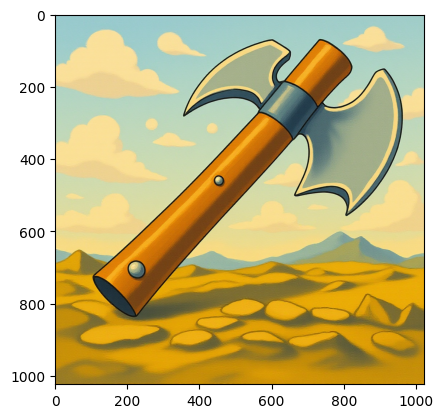

In [25]:
# show the image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

# get account info

In [26]:
url = "/".join([serverurl, "get_account_info"])
response = requests.get(url, cookies=cookies).json()
print(response)

{'balance': 0, 'client_id': 'af25d8e9971a747bf55c17195f39757b', 'email': '', 'has_free_quota_left': False, 'ip': '34.145.104.139', 'quota_free': 0.2, 'quota_used': 0.2077}
